A company plans to expand into new markets with five existing products. Based on market research, the new market's behavior is expected to resemble their current market.

In their current market, customers are divided into four segments (A, B, C, D), and targeted outreach for each segment has proven effective. The company now wants to apply the same segmentation strategy to 2,627 potential customers in the new market.

Your task is to assist in predicting the appropriate segment for each new customer.

Output should be filled csv file(test2.csv).


In [ ]:
# Akhil Tavva(IMT2020124)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score,f1_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [2]:
train_df = pd.read_csv('/content/train2.csv')
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
test_df = pd.read_csv('/content/test2.csv')
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,NaN
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,NaN
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,NaN
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,NaN
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,NaN


In [4]:
train_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
train_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
# find coorelation of all columns in train_df
# train_df.corr(numeric_only=True)

##PreProcessing

###Fill Missing Values

In [8]:
train_df.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [9]:
train_df.nunique()

,0
ID,8068
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


In [10]:
# find unique in train df
for col in train_df.columns:
    print(col, train_df[col].unique())

ID [462809 462643 466315 ... 465406 467299 461879]
Gender ['Male' 'Female']
Ever_Married ['No' 'Yes' nan]
Age [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated ['No' 'Yes' nan]
Profession ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Work_Experience [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score ['Low' 'Average' 'High']
Family_Size [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Var_1 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation ['D' 'A' 'B' 'C']


In [11]:
train_df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [12]:
def replaceNulls(df, col, const):
    # df[col].fillna(const, inplace=True)
    df.fillna({col : const}, inplace=True)

In [13]:
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].mode()[0])

# For Work_Experience it may depend on Age
# train_df['Work_Experience'] = train_df['Work_Experience'].fillna(0)
# For Family_Size use Median now
train_df.loc[:, 'Work_Experience'] = train_df['Work_Experience'].fillna(train_df['Work_Experience'].mean())
train_df.loc[:, 'Family_Size'] = train_df['Family_Size'].fillna(train_df['Family_Size'].median())

In [14]:
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    test_df.loc[:, col] = test_df[col].fillna(test_df[col].mode()[0])

test_df.loc[:, 'Work_Experience'] = test_df['Work_Experience'].fillna(test_df['Work_Experience'].mean())
test_df.loc[:, 'Family_Size'] = test_df['Family_Size'].fillna(test_df['Family_Size'].median())

In [15]:
train_df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [16]:
test_df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


###Label Encoding

In [17]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [18]:
for col in train_df.columns:
    print(col, train_df[col].unique())

ID [462809 462643 466315 ... 465406 467299 461879]
Gender ['Male' 'Female']
Ever_Married ['No' 'Yes']
Age [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated ['No' 'Yes']
Profession ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Work_Experience [ 1.          2.64166321  0.          4.          9.         12.
  3.         13.          5.          8.         14.          7.
  2.          6.         10.         11.        ]
Spending_Score ['Low' 'Average' 'High']
Family_Size [4. 3. 1. 2. 6. 5. 8. 7. 9.]
Var_1 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation ['D' 'A' 'B' 'C']


In [19]:
# # one hot encoding for gender and ever_married and graduated
# import pandas as pd

# # Assuming your DataFrame is named 'train_df'
# train_df = pd.get_dummies(train_df, columns=['Gender', 'Ever_Married', 'Graduated'], prefix=['Gender', 'Ever_Married', 'Graduated'])

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
label_encoders = {}

for col in categorical_columns:
     le = LabelEncoder()
     train_df[col] = le.fit_transform(train_df[col].astype(str))  # Convert to string to handle NaNs
     label_encoders[col] = le
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.000000,2,4.0,3,D
1,462643,0,1,38,1,2,2.641663,0,3.0,3,A
2,466315,0,1,67,1,2,1.000000,2,1.0,5,B
3,461735,1,1,67,1,7,0.000000,1,2.0,5,B
4,462669,0,1,40,1,3,2.641663,1,6.0,5,A


In [21]:
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D':3}
train_df['Segmentation'] = train_df['Segmentation'].map(label_mapping)

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_columns1 = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
label_encoders1 = {}

for col in categorical_columns1:
     le = LabelEncoder()
     test_df[col] = le.fit_transform(test_df[col].astype(str))  # Convert to string to handle NaNs
     label_encoders1[col] = le
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,1,36,1,2,0.000000,2,1.0,5,NaN
1,458994,1,1,37,1,5,8.000000,0,4.0,5,NaN
2,458996,0,1,69,0,0,0.000000,2,1.0,5,NaN
3,459000,1,1,59,0,4,11.000000,1,2.0,5,NaN
4,459001,0,0,19,0,8,2.552587,2,4.0,5,NaN


In [23]:
train_df.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,0.547471,0.592836,43.466906,0.625434,2.746901,2.641663,1.359941,2.856346,4.147372,1.561973
std,2595.381232,0.497772,0.491336,16.711696,0.484041,2.541418,3.226972,0.848418,1.499577,1.419453,1.139029
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,461240.750000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000
50%,463472.500000,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000,2.000000
75%,465744.250000,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000,3.000000
max,467974.000000,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000,3.000000


### Outliers

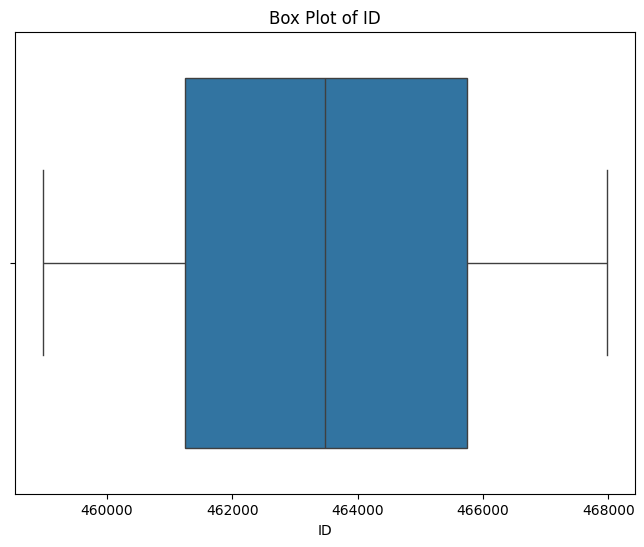

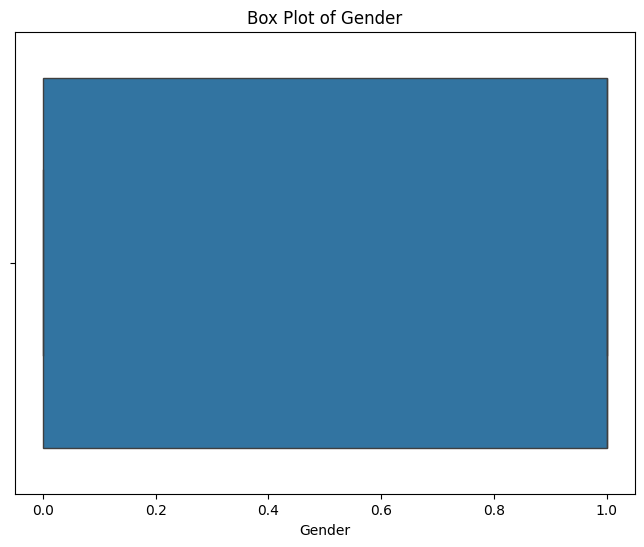

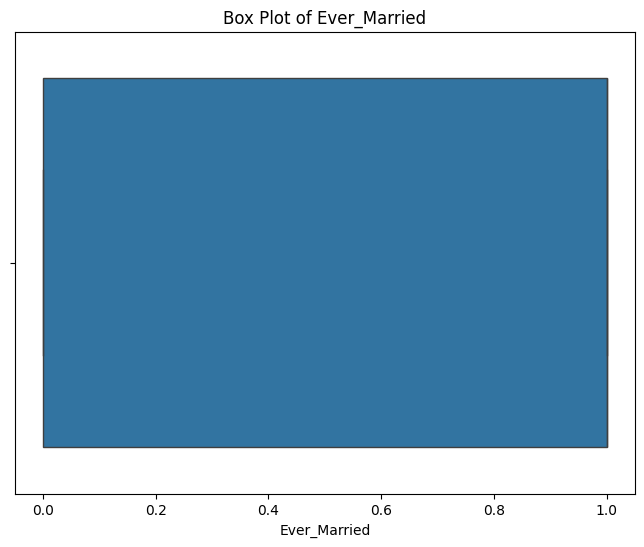

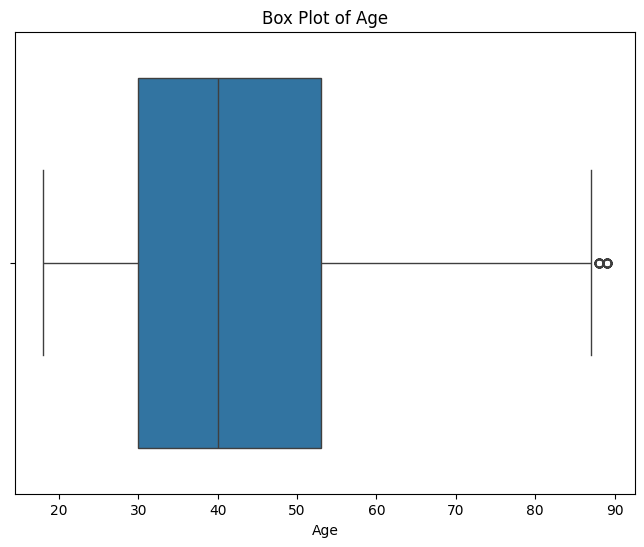

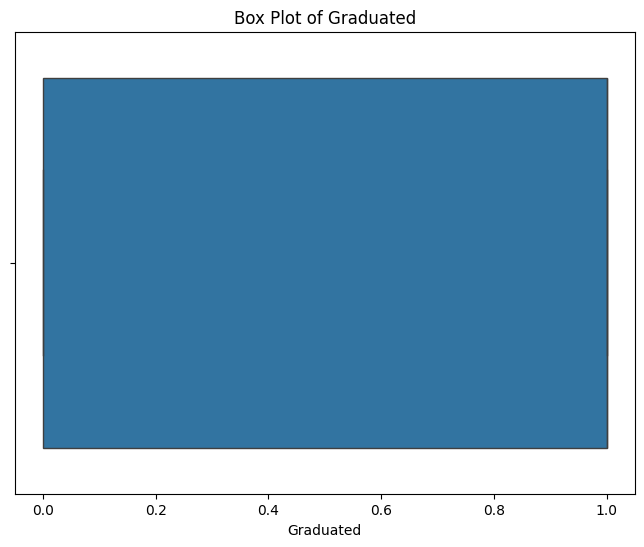

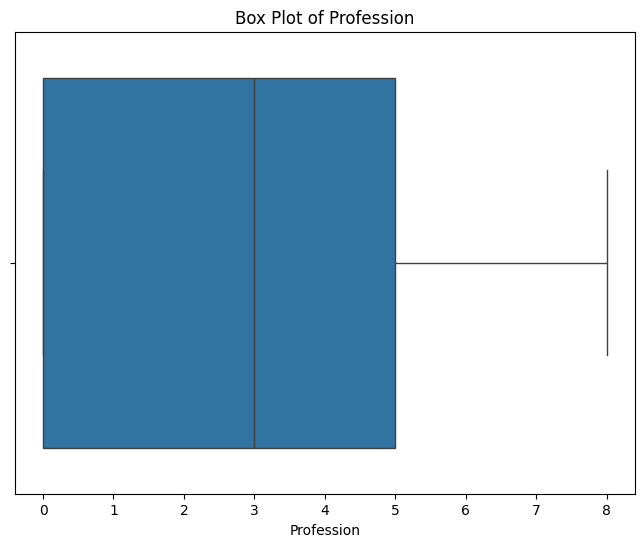

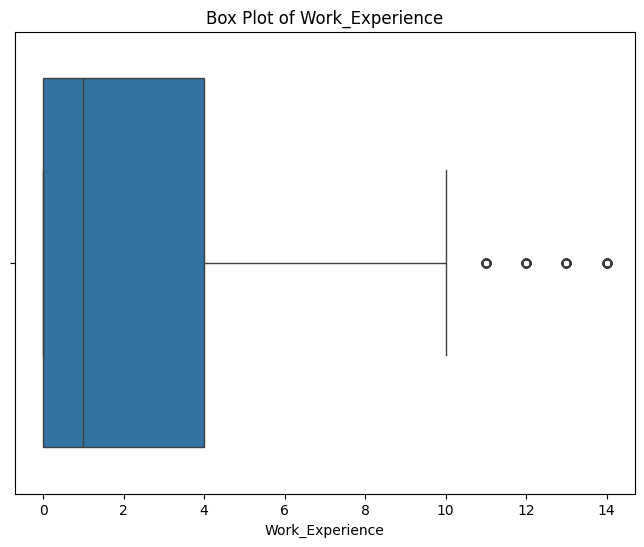

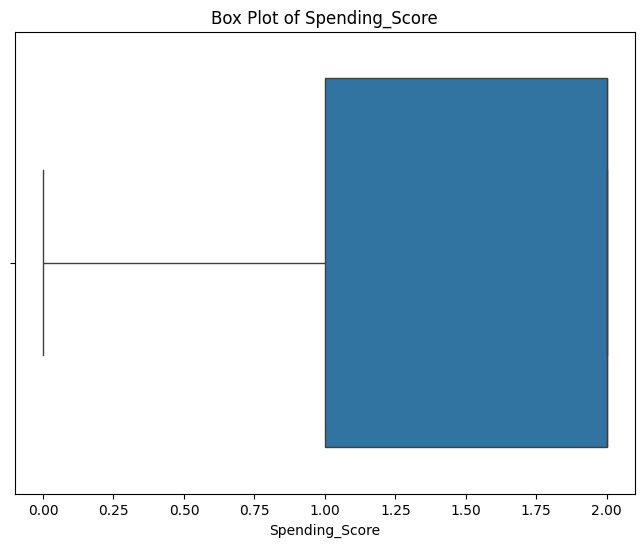

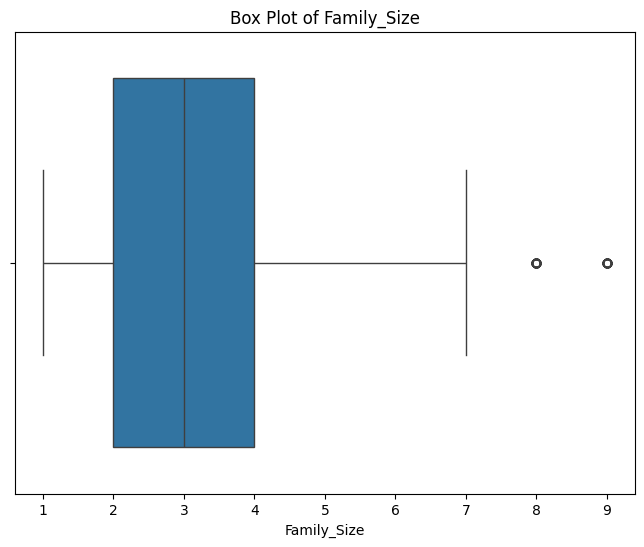

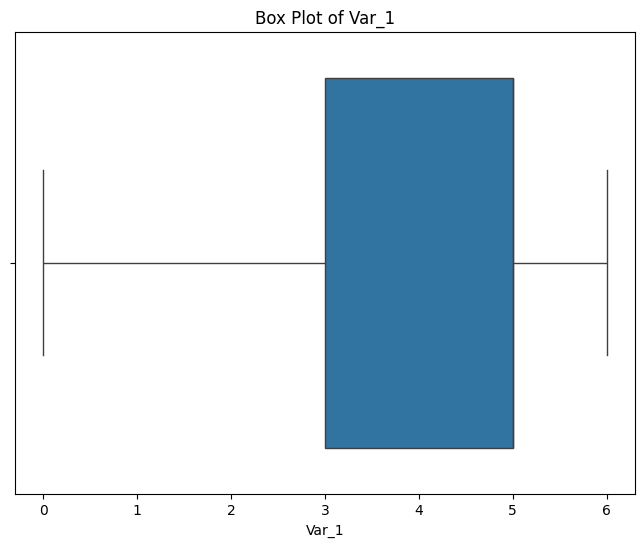

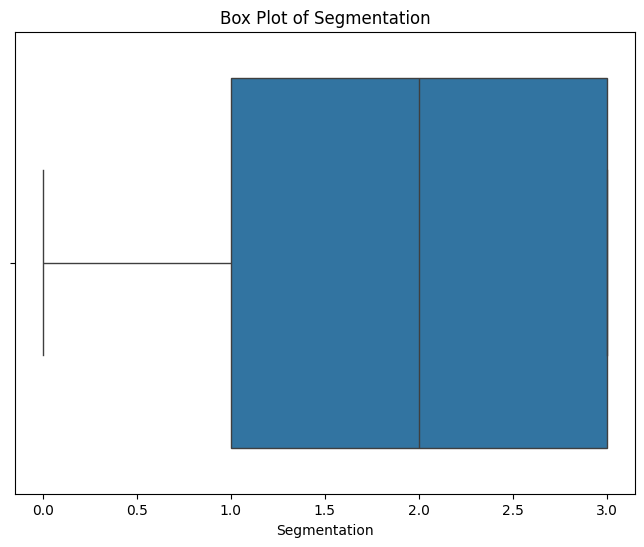

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = train_df.columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [25]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# train_df = remove_outliers_iqr(train_df, 'Age')
train_df = remove_outliers_iqr(train_df, 'Family_Size')
train_df = remove_outliers_iqr(train_df, 'Work_Experience')

In [26]:
# remove outliers in family_size and work_profession


###Correlation Matrix

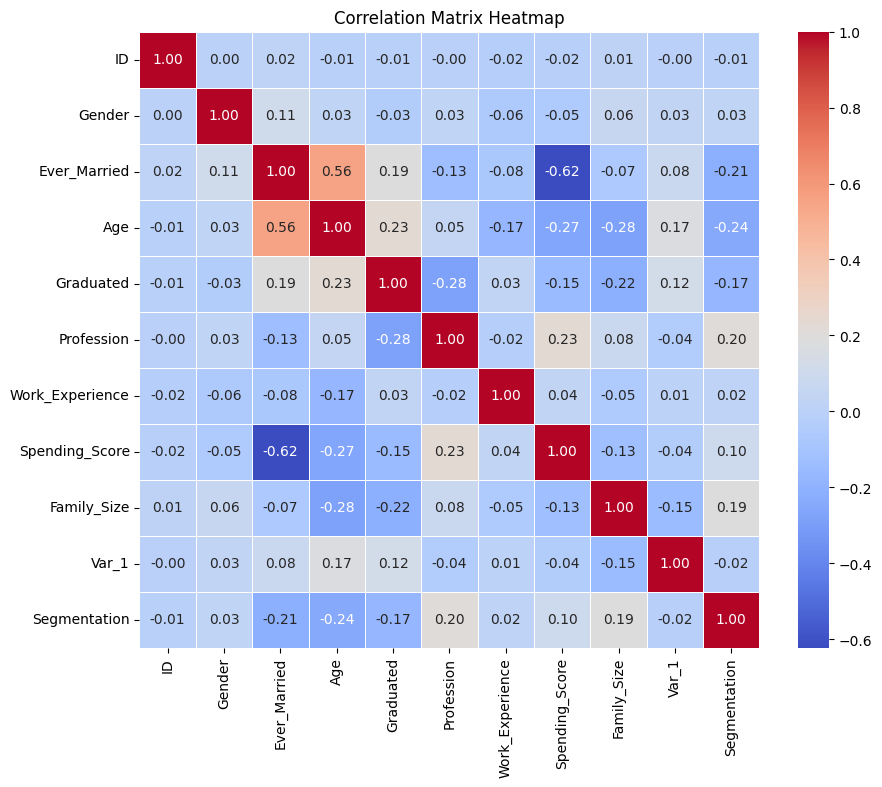

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

###SMOT

In [28]:
# from imblearn.over_sampling import SMOTE

# # Assuming 'Segmentation' is your target variable
# X = train_df.drop('Segmentation', axis=1)
# y = train_df['Segmentation']

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # If you need a DataFrame back:
# train_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Segmentation'])], axis=1)

###Scaling

In [29]:
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [30]:
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols1 = ['Age', 'Work_Experience', 'Family_Size']
scaler1 = StandardScaler()
test_df[numerical_cols1] = scaler1.fit_transform(test_df[numerical_cols1])

###Cross Validation

In [31]:
from sklearn.model_selection import train_test_split

y_tr = train_df["Segmentation"]
X_tr = train_df.drop(columns=['Segmentation','ID', 'Var_1', 'Work_Experience'])

X_train, X_validation , y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.3, random_state=42)

In [32]:
X_test = test_df.drop(columns=['Segmentation','ID', 'Var_1', 'Work_Experience'])
y_test = test_df["Segmentation"]

## Machine Learning Models

In [33]:
# # from sklearn.linear_model import LogisticRegression, Perceptron
# # from sklearn.svm import SVC
# # from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# # from lightgbm import LGBMClassifier
# # from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import KFold, cross_val_score
# from imblearn.over_sampling import SMOTE


# # Models to evaluate
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=100000, random_state=42),
#     "SVM": SVC(),
#     "Random Forest": RandomForestClassifier(n_estimators = 100, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
#     "LightGBM": LGBMClassifier(n_estimators=1000, learning_rate=0.8, random_state=42,eta=0.8),
#     "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
# }

# # K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for model_name, model in models.items():
#     print(f"\nEvaluating: {model_name}")
#     accuracies = []
#     f1_scores = []

#     for train_index, test_index in kf.split(X_tr): # Split X_tr instead of X
#         X_train1, X_test = X_tr.iloc[train_index], X_tr.iloc[test_index] # Use .iloc for integer-location based indexing
#         y_train1, y_test = y_tr.iloc[train_index], y_tr.iloc[test_index] # Use .iloc for integer-location based indexing

#         # Fit the model
#         model.fit(X_train1, y_train1)

#         # Make predictions
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         accuracy = accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred, average='weighted')

#         accuracies.append(accuracy)
#         f1_scores.append(f1)

#     print(f"Mean Accuracy: {sum(accuracies)/len(accuracies):.4f}")
#     print(f"Mean F1 Score: {sum(f1_scores)/len(f1_scores):.4f}")

In [34]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [35]:
# Logistic Regression
start = time.time()
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_validation)
print('Logistic Regression - Training Score:', log_reg.score(X_validation, y_validation))
print("F1 Score:", f1_score(y_validation, y_pred_log_reg, average='weighted'))
print('Logistic Regression - MSE:', mean_squared_error(y_validation, y_pred_log_reg))
end = time.time()
print("Logistic Regression - Total time: {:.2f} mins".format((end - start) / 60.0))

Logistic Regression - Training Score: 0.5010697475395807
F1 Score: 0.48301737873114664
Logistic Regression - MSE: 1.7492511767222936
Logistic Regression - Total time: 0.00 mins


In [36]:
# Random Forest Classifier
start = time.time()
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_validation)
print('Random Forest - Training Score:', random_forest.score(X_validation, y_validation))
print("F1 Score:", f1_score(y_validation, y_pred_rf, average='weighted'))
print('Random Forest - MSE:', mean_squared_error(y_validation, y_pred_rf))
end = time.time()
print("Random Forest - Total time: {:.2f} mins".format((end - start) / 60.0))


Random Forest - Training Score: 0.46598202824133506
F1 Score: 0.46513798829371067
Random Forest - MSE: 1.8485237483953787
Random Forest - Total time: 0.02 mins


In [37]:
# LightGBM Classifier
start = time.time()
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.8)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_validation)
print('LightGBM - Training Score:', lgbm.score(X_validation, y_validation))
print("F1 Score:", f1_score(y_validation, y_pred_lgbm, average='weighted'))
print('LightGBM - MSE:', mean_squared_error(y_validation, y_pred_lgbm))
end = time.time()
print("LightGBM - Total time: {:.2f} mins".format((end - start) / 60.0))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 5453, number of used features: 7
[LightGBM] [Info] Start training from score -1.414753
[LightGBM] [Info] Start training from score -1.425376
[LightGBM] [Info] Start training from score -1.434571
[LightGBM] [Info] Start training from score -1.278772
LightGBM - Training Score: 0.47325631151048353
F1 Score: 0.47422016228993147
LightGBM - MSE: 1.8112965340179719
LightGBM - Total time: 0.11 mins


In [38]:
# SVM Classifier
start = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_validation)
print('SVM - Training Score:', svm.score(X_validation, y_validation))
print("F1 Score:", f1_score(y_validation, y_pred_svm, average='weighted'))
print('SVM - MSE:', mean_squared_error(y_validation, y_pred_svm))
end = time.time()
print("SVM - Total time: {:.2f} mins".format((end - start) / 60.0))


SVM - Training Score: 0.5186136071887034
F1 Score: 0.520660724257362
SVM - MSE: 1.5943517329910142
SVM - Total time: 0.04 mins


In [39]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import time

start = time.time()
XGBR_model = xgb.XGBClassifier(n_estimators=100, eta=0.8)
XGBR_model.fit(X_train, y_train)
y_pred = XGBR_model.predict(X_validation)
print('Training Score:', XGBR_model.score(X_validation, y_validation))
print("F1 Score:", f1_score(y_validation, y_pred, average='weighted'))
print(mean_squared_error(y_validation, y_pred))
end = time.time()

duration = round((end-start)/60.0, 2)
print("Total time: " + str(duration) + "mins")

Training Score: 0.49080017115960634
F1 Score: 0.48980303407384845
1.8014548566538298
Total time: 0.01mins


###BalancedBaggingClassifier

In [40]:
# # BalancedBaggingClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Create a Random Forest Classifier (you can use any classifier)
# base_classifier = RandomForestClassifier(random_state=42)
# # Create a BalancedBaggingClassifier
# balanced_bagging_classifier = BalancedBaggingClassifier(base_classifier,
# 														sampling_strategy='auto', # You can adjust this parameter
# 														replacement=False, # Whether to sample with or without replacement
# 														random_state=42)

# # Fit the model
# balanced_bagging_classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = balanced_bagging_classifier.predict(X_validation)
# # Evaluate the performance
# print("Accuracy:", accuracy_score(y_validation, y_pred))
# print("Classification Report:\n", classification_report(y_validation, y_pred))


###Neural Networks

In [41]:
# Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_train_nn = to_categorical(y_train)
y_validation_nn = to_categorical(y_validation)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train_nn.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_nn, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred_nn = model.predict(X_validation)

test_loss, test_accuracy = model.evaluate(X_validation, y_validation_nn, verbose=0)
print("Neural Network Model Accuracy:", test_accuracy)

y_pred_classes = np.argmax(y_pred_nn, axis=1)
y_true_classes = np.argmax(y_validation_nn, axis=1)
print("F1 Score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2777 - loss: 1.5097 - val_accuracy: 0.4436 - val_loss: 1.2372
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4253 - loss: 1.2692 - val_accuracy: 0.4940 - val_loss: 1.1672
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4654 - loss: 1.1881 - val_accuracy: 0.5041 - val_loss: 1.1547
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4739 - loss: 1.1765 - val_accuracy: 0.5115 - val_loss: 1.1452
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4707 - loss: 1.1625 - val_accuracy: 0.5096 - val_loss: 1.1349
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4801 - loss: 1.1330 - val_accuracy: 0.5197 - val_loss: 1.1317
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5036 - loss: 1.1487 - val_accuracy: 0.5170 - val_loss: 1.1303
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4840 - loss: 1.1489 - val_accuracy: 0.5005

In [42]:
y_test_nn = model.predict(X_test)
y_test_classes = np.argmax(y_test_nn, axis=1)
label_mapping_rev = {0:'A', 1:'B', 2:'C', 3:'D'}


test2_df = pd.read_csv('/content/test2.csv')
test2_df['Segmentation'] = pd.Series(y_test_classes).map(label_mapping_rev)
test2_df.to_csv('test2_ans.csv', index=False)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

import time
start = time.time()
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_validation)
end = time.time()
# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_validation, y_pred))
print("F1 Score:", f1_score(y_validation, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_validation, y_pred))
print("Random Forest - Total time: {:.2f} mins".format((end - start) / 60.0))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.519469405220368
F1 Score: 0.5143327227540944
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.39      0.40       567
           1       0.38      0.36      0.37       500
           2       0.62      0.55      0.58       622
           3       0.60      0.73      0.66       648

    accuracy                           0.52      2337
   macro avg       0.50      0.51      0.50      2337
weighted avg       0.51      0.52      0.51      2337

Random Forest - Total time: 8.22 mins


In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import time

# Adjusted Hyperparameter Grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 50, 100],          # Expanded range for C
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Finer granularity for gamma
    'kernel': ['rbf']                    # Focused on RBF kernel
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,                                # Increased number of folds
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

# Best model and parameters
best_svc_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Grid Search Time: {:.2f} mins".format((end - start) / 60.0))

# Make predictions
y_pred = best_svc_model.predict(X_validation)

# Evaluate the model
print("Accuracy:", accuracy_score(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Grid Search Time: 3.21 mins
Accuracy: 0.5271715875053488
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.42      0.43       567
           1       0.37      0.37      0.37       500
           2       0.62      0.54      0.58       622
           3       0.62      0.73      0.67       648

    accuracy                           0.53      2337
   macro avg       0.51      0.51      0.51      2337
weighted avg       0.52      0.53      0.52      2337



In [45]:
# find the expected output of test_df
# y_test = best_model(X_test)
# take the csv path create new test file then add the y_test to that new file